In [9]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Loading images
file_names = ["hdr-jpg/A45A6923.jpg",
            "hdr-jpg/A45A6924.jpg",
            "hdr-jpg/A45A6925.jpg",
            "hdr-jpg/A45A6926.jpg",
            "hdr-jpg/A45A6927.jpg",
            "hdr-jpg/A45A6928.jpg",
            "hdr-jpg/A45A6929.jpg",
            "hdr-jpg/A45A6930.jpg",
            "hdr-jpg/A45A6931.jpg",
            "hdr-jpg/A45A6932.jpg",
            "hdr-jpg/A45A6933.jpg",
            "hdr-jpg/A45A6934.jpg"]
images = [cv.imread(fn) for fn in file_names]
exposure_time = np.array([13.0, 6.0, 3.2, 1.6, 0.8, 1/2, 1/5, 1/10, 1/20, 1/40, 1/80, 1/160], dtype=np.float32)

In [4]:
# Align input images
alignMTB = cv.createAlignMTB()
alignMTB.process(images, images)

In [6]:
# Camera luminosity function
calibrateDebevec = cv.createCalibrateDebevec()
luminosityDebevec = calibrateDebevec.process(images, exposure_time)

In [11]:
luminosityDebevec.shape

(256, 1, 3)

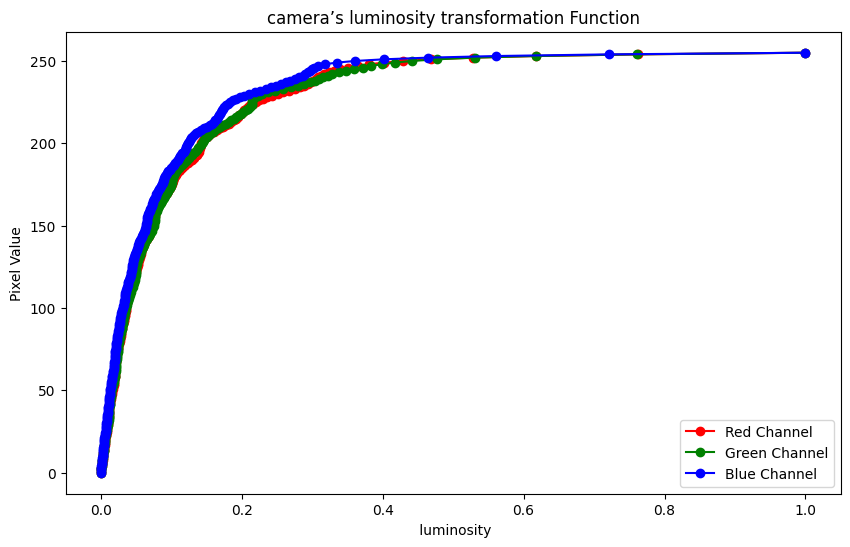

In [16]:
# Extract individual channels
channel_names = ['Red', 'Green', 'Blue']
channel_colors = ['red', 'green', 'blue']

# Create a single plot for all channels
fig, ax = plt.subplots(figsize=(10, 6))

for i in range(3):
    # Flatten the luminosityDebevec array for each channel
    luminosity_values = luminosityDebevec[:, :, i].flatten()

    # Normalize the luminosity values to be in the range [0, 1]
    normalized_luminosity = (luminosity_values - np.min(luminosity_values)) / (np.max(luminosity_values) - np.min(luminosity_values))

    # Plot each channel on the same plot with the respective color
    ax.plot(normalized_luminosity, np.arange(256), label=f'{channel_names[i]} Channel', color=channel_colors[i], marker='o')

ax.set_title('camera’s luminosity transformation Function')
ax.set_xlabel(' luminosity')
ax.set_ylabel('Pixel Value')
ax.legend()

plt.show()

In [18]:
# Merge exposure images into one HDR image
mergeDebevec = cv.createMergeDebevec()
hdrDebevec = mergeDebevec.process(images, exposure_time, luminosityDebevec)

In [21]:
# Tonemap
tonemapDrago = cv.createTonemapDrago(1.0, 0.7)
ldrDrago = tonemapDrago.process(hdrDebevec)
ldrDrago = 3 * ldrDrago
cv.imwrite("ldr-Drago.jpg", ldrDrago * 255)

True